<a href="https://colab.research.google.com/github/naidu1997/Machine-Learning/blob/main/support_vector_machine_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data= pd.read_csv('/content/archive (23).zip')

In [6]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53,0.7,2136,3,...,905,1988,12631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.tail()

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0.0,1.0,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5.0,1.0,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc_megapixel   2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   int64  
 7   m_depth        2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc_megapixel   2000 non-null   float64
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
data.shape

(2000, 21)

In [14]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309000,0.520781,32.046500,0.501750,141.749000,4.520500,...,645.108000,1251.515500,2134.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341883,0.499318,18.145715,0.288416,61.460562,2.287837,...,443.780811,432.199447,1130.827312,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3069.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,2136.000000,8.000000,...,1960.000000,1998.000000,12631.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [19]:
data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
fc_megapixel,0
four_g,0
int_memory,0
m_depth,0
mobile_wt,0
n_cores,0


<Axes: xlabel='price_range', ylabel='ram'>

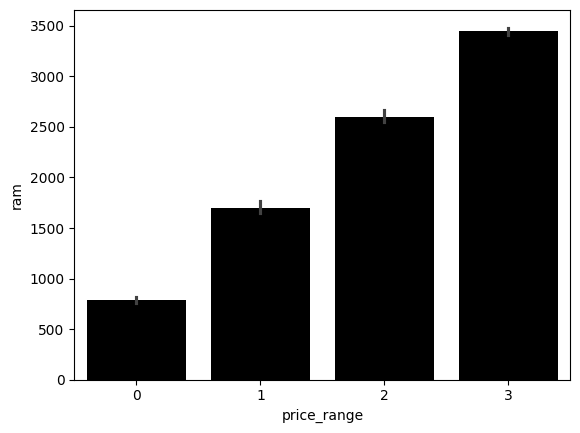

In [26]:
#visualization
sns.barplot(x= 'price_range',y= 'ram',data= data,color='black')

<Axes: xlabel='price_range', ylabel='battery_power'>

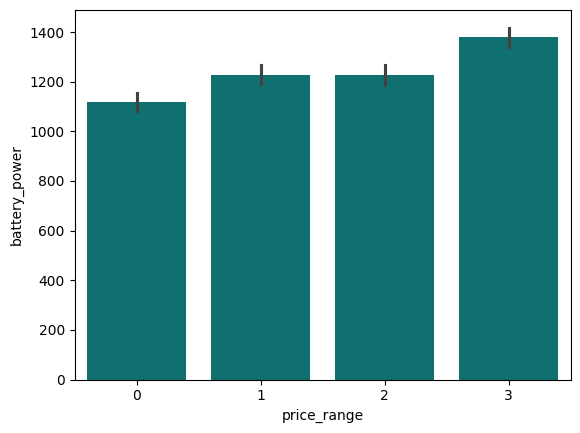

In [28]:
sns.barplot(x='price_range',y='battery_power',data= data,color='teal')

<Axes: xlabel='price_range', ylabel='int_memory'>

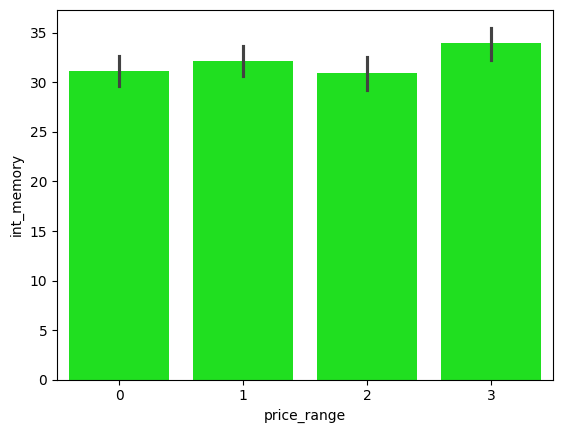

In [31]:
sns.barplot(x='price_range',y='int_memory',data= data,color='lime')

<Axes: xlabel='price_range', ylabel='px_height'>

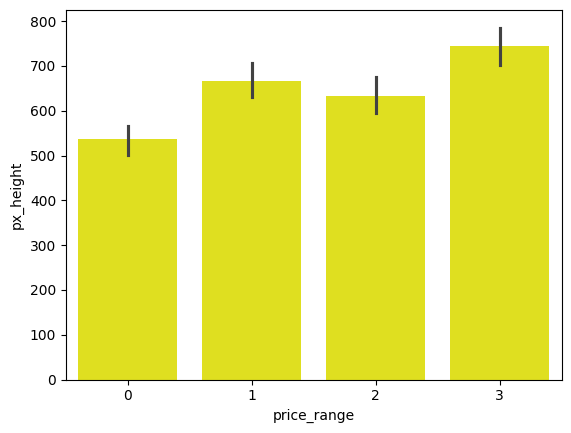

In [33]:
sns.barplot(x='price_range',y='px_height',data= data,color='yellow')

In [37]:
y= data['price_range'].values
x_data= data.drop('price_range',axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15,random_state=12)

In [38]:
from sklearn.svm import SVC
svm= SVC(random_state=12)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9547058823529412
test accuracy: 0.9566666666666667
